In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn

In [2]:
data = pd.read_csv('data/surveys (1).csv')
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
0,ecpb0,178484003,2024-02-05,2024-02-05 09:36:39.000,Peace church,acquahmary574@gmail.com,Packaging,2024-02-05 09:40:44.000,Food Industry,1,0,0,0
1,NaN,844806159,2024-01-29,2024-01-30 23:10:06.000,GBC bank,hensy.ai@gmail.com,Owner,2024-01-30 23:29:41.000,Transportation,1,0,0,0
2,ecpb1,832139937,2024-01-22,2024-01-27 17:15:06.000,ATTA MILLS,arhinm220@gmail.com,DRIVER,2025-02-06 11:16:37.000,Transportation,1,0,1,0
3,ecy1p,279135133,2024-03-04,2024-03-05 21:10:31.000,old karaga street,NaN,accountant,2024-03-05 21:21:50.000,Healthcare,1,0,0,0
4,ebzze,368413062,2024-03-04,2024-03-06 19:42:23.000,Abebrese Street,dadzitheodora77@gmail.com,nurse,2024-03-19 08:52:37.000,Healthcare,1,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380461 entries, 0 to 380460
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   HASH         354248 non-null  object
 1   CLIENT_ID    380461 non-null  int64 
 2   SURVEY_WEEK  380461 non-null  object
 3   SURVEY_DATE  380461 non-null  object
 4   ADDRESS      380249 non-null  object
 5   EMAIL        269941 non-null  object
 6   POSITION     354927 non-null  object
 7   DISB_DATE    177915 non-null  object
 8   INDUSTRY     354961 non-null  object
 9   DISBURSED    380461 non-null  int64 
 10  DR1          380461 non-null  int64 
 11  DEFAULTED    380461 non-null  int64 
 12  PTFRAUD      380461 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 37.7+ MB


In [4]:
data['SURVEY_WEEK'] = pd.to_datetime(data['SURVEY_WEEK'])

# Convert weekly dates into biweekly periods
data['biweekly_period'] = data['SURVEY_WEEK'].dt.to_period("2W")


In [5]:
data.head()

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,biweekly_period
0,ecpb0,178484003,2024-02-05,2024-02-05 09:36:39.000,Peace church,acquahmary574@gmail.com,Packaging,2024-02-05 09:40:44.000,Food Industry,1,0,0,0,2024-02-05/2024-02-11
1,NaN,844806159,2024-01-29,2024-01-30 23:10:06.000,GBC bank,hensy.ai@gmail.com,Owner,2024-01-30 23:29:41.000,Transportation,1,0,0,0,2024-01-29/2024-02-04
2,ecpb1,832139937,2024-01-22,2024-01-27 17:15:06.000,ATTA MILLS,arhinm220@gmail.com,DRIVER,2025-02-06 11:16:37.000,Transportation,1,0,1,0,2024-01-22/2024-01-28
3,ecy1p,279135133,2024-03-04,2024-03-05 21:10:31.000,old karaga street,NaN,accountant,2024-03-05 21:21:50.000,Healthcare,1,0,0,0,2024-03-04/2024-03-10
4,ebzze,368413062,2024-03-04,2024-03-06 19:42:23.000,Abebrese Street,dadzitheodora77@gmail.com,nurse,2024-03-19 08:52:37.000,Healthcare,1,0,0,0,2024-03-04/2024-03-10


In [6]:
# data['SURVEY_WEEK'] = pd.to_datetime(data['SURVEY_WEEK'])
# data.head()

In [7]:
# data.head()

In [8]:
df = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'EMAIL', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
df.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/35357548.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'EMAIL', 'INDUSTRY']).agg(


,,,,,nsurveys,nloans,ndefaults,npfraud
HASH,biweekly_period,ADDRESS,EMAIL,INDUSTRY,,,,
6gg7r,2024-09-02/2024-09-08,Abura Clinic,lolokoklu@yahoo.com,Legal,1,0,0,0
7ff38,2024-11-25/2024-12-01,Apple st,samsonobour4@gmail.com,Education,1,0,0,0
7hfq5,2024-11-25/2024-12-01,kpone katamanso,bulluchsandra794@gmail.com,Construction,1,0,0,0
7nj9g,2024-08-19/2024-08-25,Dolphin street,agyarkobenard6@gmail.com,Trade - Retail,1,0,0,0
7nxpn,2024-01-15/2024-01-21,OSTWE CLOSE,quincyagbanyo@gmail.com,Hotel and restaurants,1,0,0,0


## Address Duplication vs DR

In [9]:
dup_address = data.groupby(['HASH', 'biweekly_period', 'ADDRESS']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_address = dup_address[dup_address['nsurveys'] >= 2]
dup_address.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/4251450843.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_address = data.groupby(['HASH', 'biweekly_period', 'ADDRESS']).agg(


nsurveys  nloans  ndefaults  \
HASH  biweekly_period       ADDRESS                                            
ebvuw 2024-04-15/2024-04-21 Methodist Church            2       1          0   
      2024-06-17/2024-06-23 Methodist church            2       1          1   
      2024-12-23/2024-12-29 Half Assini                 2       1          0   
ebvux 2024-05-13/2024-05-19 Old Edobo Chip Zone         3       1          0   
eby7q 2024-09-09/2024-09-15 church street               2       1          0   

                                                 npfraud  
HASH  biweekly_period       ADDRESS                       
ebvuw 2024-04-15/2024-04-21 Methodist Church           0  
      2024-06-17/2024-06-23 Methodist church           1  
      2024-12-23/2024-12-29 Half Assini                0  
ebvux 2024-05-13/2024-05-19 Old Edobo Chip Zone        0  
eby7q 2024-09-09/2024-09-15 church street              0

In [10]:
dup_address['nsurveys'].min()

np.int64(2)

In [11]:
dup_address['dr'] = dup_address['ndefaults']/dup_address['nloans']
dup_address['fr'] = dup_address['npfraud']/dup_address['nloans']

In [12]:
import matplotlib.pyplot as plt

Distribution of default rates  for duplicated addresses

[]

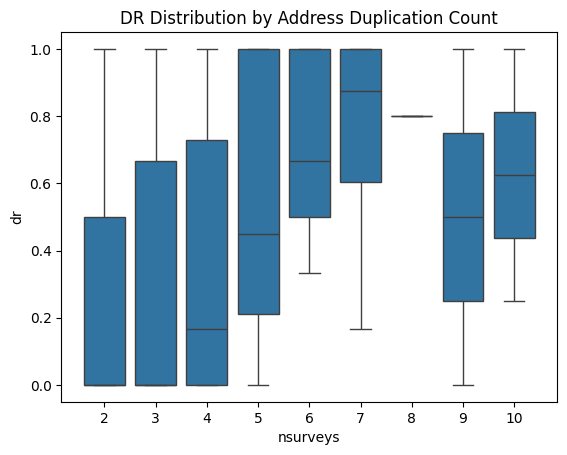

In [13]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_address)
plt.title('DR Distribution by Address Duplication Count')
plt.plot()

In [14]:
highdr = dup_address[(dup_address['nsurveys'] >= 4) & (dup_address['nloans'] >= 3)]
highdr.head()

,,,nsurveys,nloans,ndefaults,npfraud,dr,fr
HASH,biweekly_period,ADDRESS,,,,,,
ebyh8,2024-10-14/2024-10-20,AHOBRE 1,5,5,2,1,0.4,0.2
ebysp,2024-11-11/2024-11-17,Near main market,9,5,5,5,1.0,1.0
ebytc,2024-01-08/2024-01-14,TB 74 Teberebe,8,5,4,4,0.8,0.8
ebyw4,2024-12-09/2024-12-15,Tarkwa na Aboso,5,3,0,0,0.0,0.0
ebzj4,2024-01-08/2024-01-14,University of Cape Coast,4,3,0,0,0.0,0.0


[]

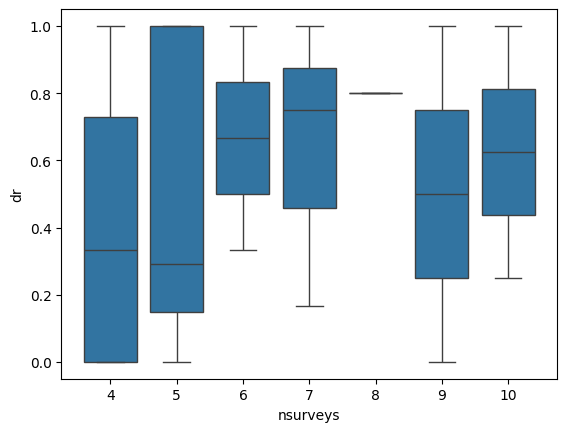

In [15]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = highdr)
plt.plot()

In [16]:
highdr.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 46 entries, ('ebyh8', Period('2024-10-14/2024-10-20', '2W-SUN'), 'AHOBRE 1') to ('s126f', Period('2024-09-02/2024-09-08', '2W-SUN'), 'Pentecost Church')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   nsurveys   46 non-null     int64  
 1   nloans     46 non-null     int64  
 2   ndefaults  46 non-null     int64  
 3   npfraud    46 non-null     int64  
 4   dr         46 non-null     float64
 5   fr         46 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 2.3+ MB


Summary DR of DupSurveys

In [17]:
summary = dup_address.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/1556822430.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_address.groupby(['nsurveys']).agg(


,nloans,ndefaults,dr1
nsurveys,,,
2,3704,1029,0.277808
3,488,176,0.360656
4,111,43,0.387387
5,56,27,0.482143
6,14,10,0.714286
7,14,8,0.571429
8,5,4,0.800000
9,16,7,0.437500
10,12,9,0.750000


In [18]:
summary = summary.reset_index()

In [19]:
summary.head(10)

,nsurveys,nloans,ndefaults,dr1
0,2,3704,1029,0.277808
1,3,488,176,0.360656
2,4,111,43,0.387387
3,5,56,27,0.482143
4,6,14,10,0.714286
5,7,14,8,0.571429
6,8,5,4,0.800000
7,9,16,7,0.437500
8,10,12,9,0.750000


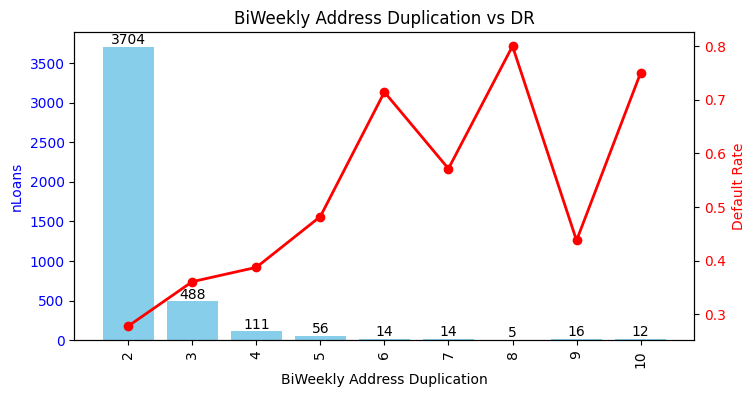

In [20]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address Duplication vs DR')
plt.show()

Duplicate Address + Email vs DR

In [21]:
dup_add_email = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'EMAIL']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_email['dr'] = dup_add_email['ndefaults']/dup_add_email['nloans']
dup_add_email['fr'] = dup_add_email['npfraud']/dup_add_email['nloans']
dup_add_email = dup_add_email[dup_add_email['nsurveys'] >= 2]
dup_add_email.head()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3640896560.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_email = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'EMAIL']).agg(


,,,,nsurveys,nloans,ndefaults,npfraud,dr,fr
HASH,biweekly_period,ADDRESS,EMAIL,,,,,,
ebvuw,2024-04-15/2024-04-21,Methodist Church,ransfordannan61@gmail.com,2,1,0,0,0.0,0.0
ebye7,2024-08-26/2024-09-01,Pine st,spintodidon@gmail.com,2,1,1,1,1.0,1.0
ebyez,2024-09-23/2024-09-29,Fox fm,michaelbamfo2017@gmail.com,2,2,0,0,0.0,0.0
ebyry,2024-08-26/2024-09-01,Jemeh road,saanluka@gmail.com,2,2,0,0,0.0,0.0
ebysp,2024-07-29/2024-08-04,Alfalfa street,Oliviamanu78@gmail.com,2,2,0,0,0.0,0.0


[]

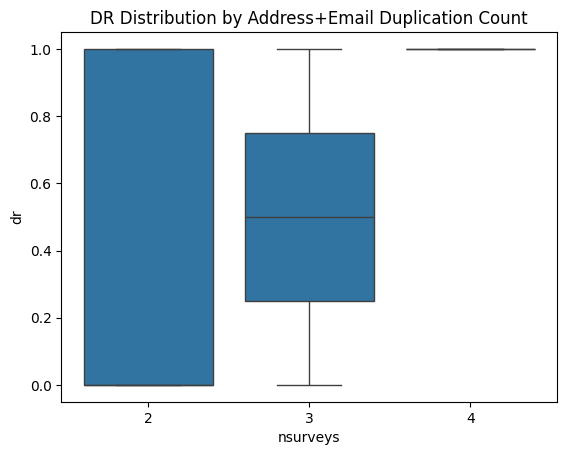

In [22]:
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_email)
plt.title('DR Distribution by Address+Email Duplication Count')
plt.plot()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/332176923.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY']).agg(


[]

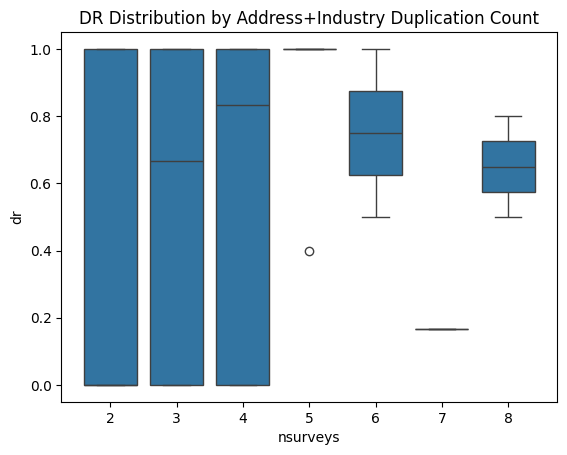

In [23]:
dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()

In [24]:
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/2880321649.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


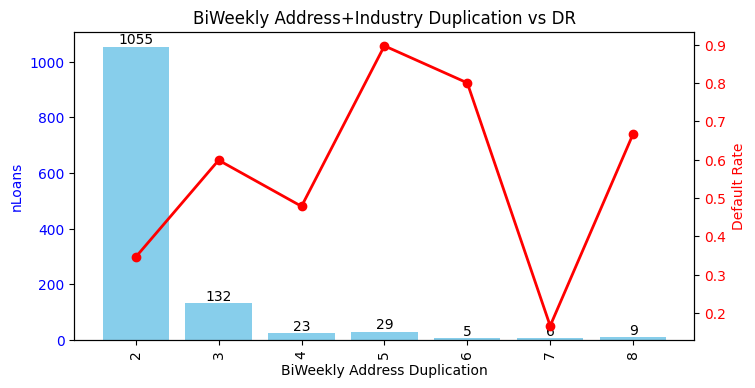

In [25]:
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address+Industry Duplication vs DR')
plt.show()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3022932801.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'POSITION']).agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3022932801.py:13: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


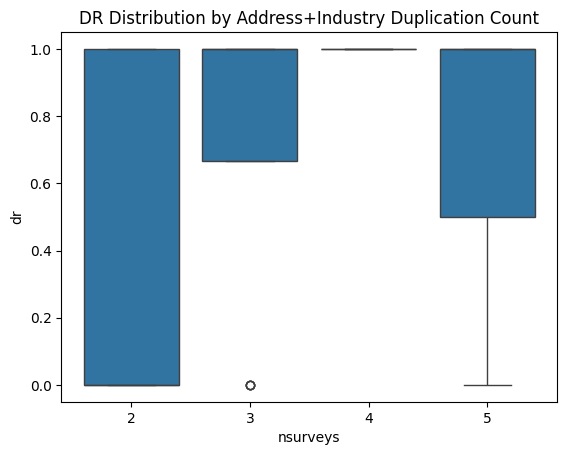

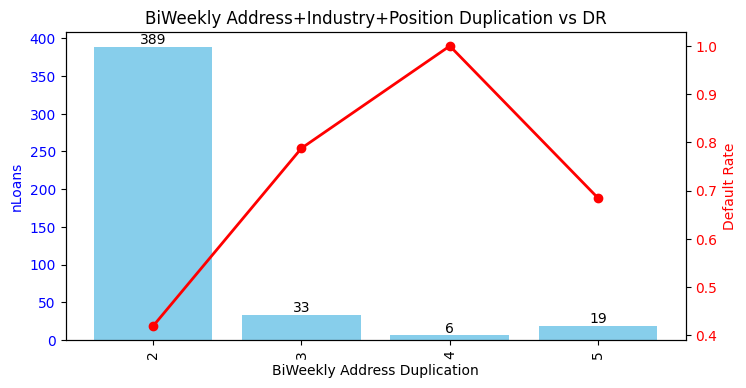

In [26]:
dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'POSITION']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address+Industry+Position Duplication vs DR')
plt.show()


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3765294227.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS',  'POSITION']).agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3765294227.py:13: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


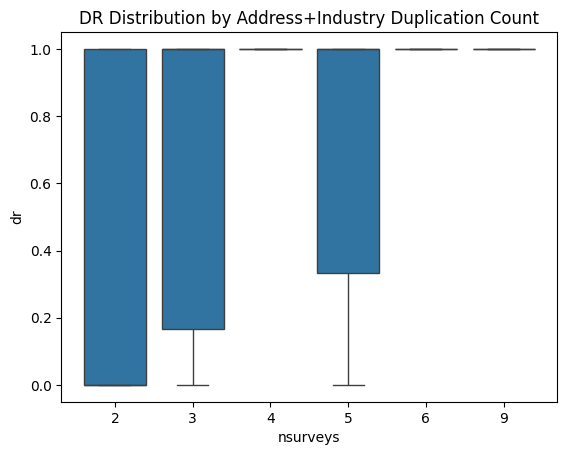

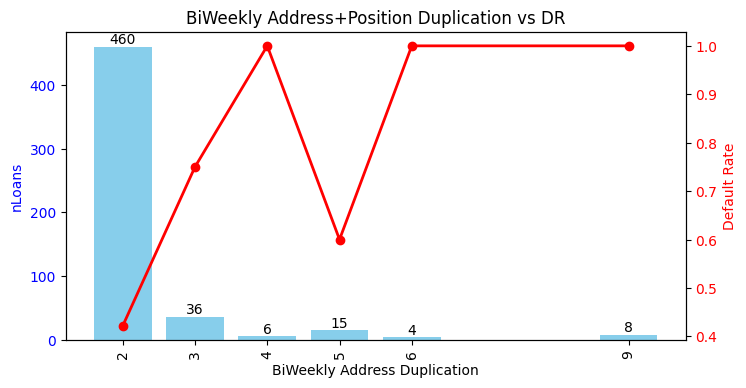

In [27]:
dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS',  'POSITION']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address+Position Duplication vs DR')
plt.show()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/2001963373.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'INDUSTRY', 'POSITION']).agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/2001963373.py:13: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


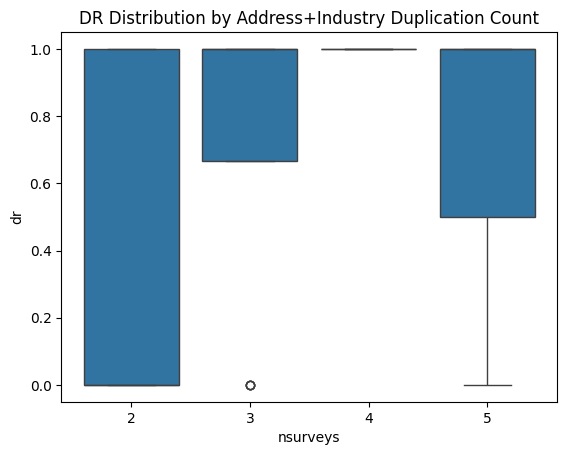

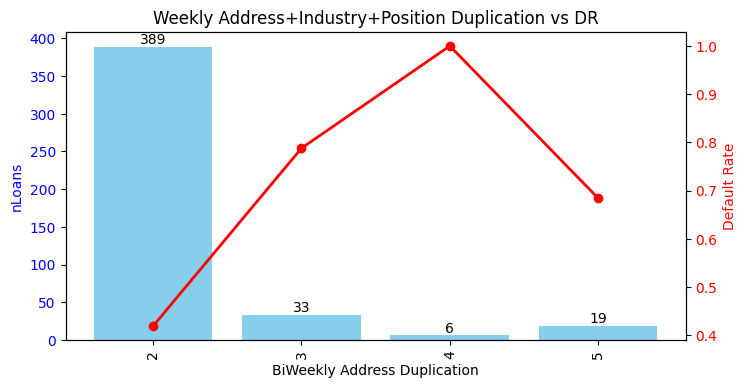

In [28]:
dup_add_ind = data.groupby(['HASH', 'SURVEY_WEEK', 'ADDRESS', 'INDUSTRY', 'POSITION']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('Weekly Address+Industry+Position Duplication vs DR')
plt.show()

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/477855314.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'POSITION', 'EMAIL']).agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/477855314.py:13: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


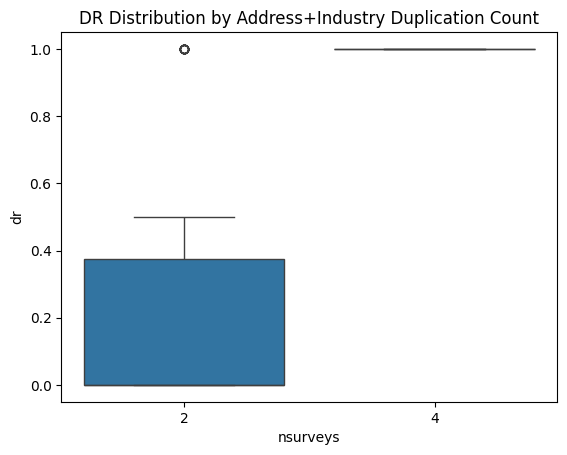

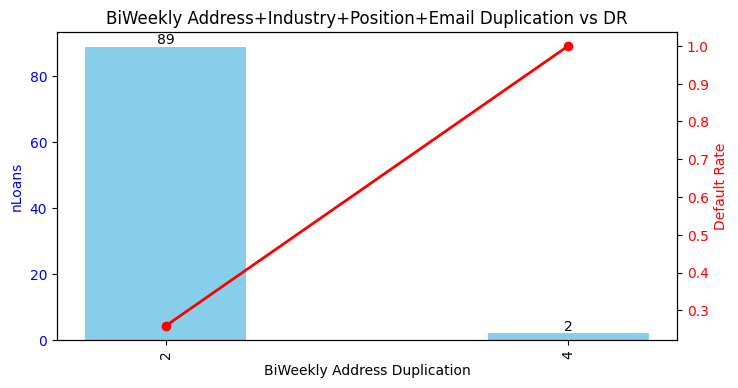

In [29]:
dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'POSITION', 'EMAIL']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address+Industry+Position+Email Duplication vs DR')
plt.show()


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3561570032.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'EMAIL']).agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3561570032.py:13: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  summary = dup_add_ind.groupby(['nsurveys']).agg(


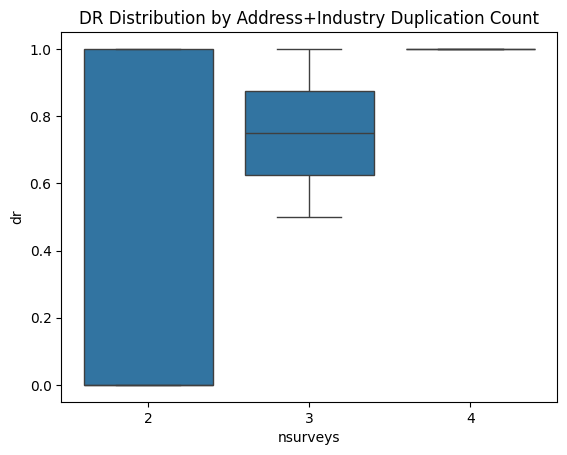

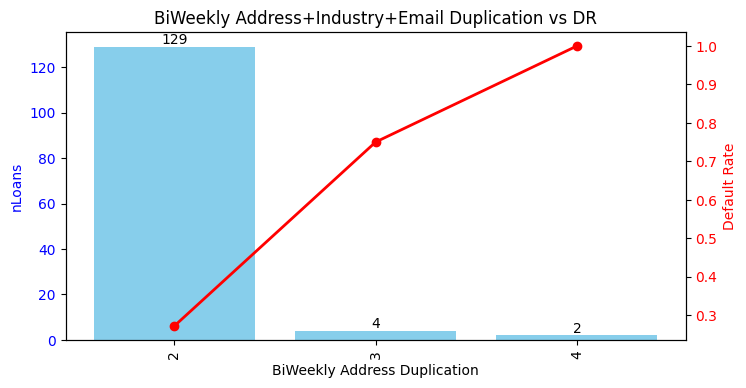

In [30]:
dup_add_ind = data.groupby(['HASH', 'biweekly_period', 'ADDRESS', 'INDUSTRY', 'EMAIL']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_add_ind['dr'] = dup_add_ind['ndefaults']/dup_add_ind['nloans']
dup_add_ind['fr'] = dup_add_ind['npfraud']/dup_add_ind['nloans']
dup_add_ind = dup_add_ind[dup_add_ind['nsurveys'] >= 2]
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_add_ind)
plt.title('DR Distribution by Address+Industry Duplication Count')
plt.plot()
summary = dup_add_ind.groupby(['nsurveys']).agg(
    nloans = ('nloans', sum),
    ndefaults = ('ndefaults', sum)
)
summary['dr1'] = summary['ndefaults']/summary['nloans']
summary.head(10)
summary = summary.reset_index()
fig, ax1 = plt.subplots(figsize=(8, 4))


bars = ax1.bar(summary['nsurveys'], summary['nloans'], color='skyblue', label='Count')
ax1.set_xlabel('BiWeekly Address Duplication')
ax1.set_ylabel('nLoans', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax1.set_xticks(summary['nsurveys'])
ax1.set_xticklabels(summary['nsurveys'], rotation=90)
# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(summary['nsurveys'],summary['dr1'], color='red', marker='o', linestyle='-', linewidth=2, label='Rate')
ax2.set_ylabel('Default Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

for bar in bars: 
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')


plt.title('BiWeekly Address+Industry+Email Duplication vs DR')
plt.show()


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/1962173608.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dup_ind = data.groupby(['HASH', 'biweekly_period', 'INDUSTRY']).agg(


[]

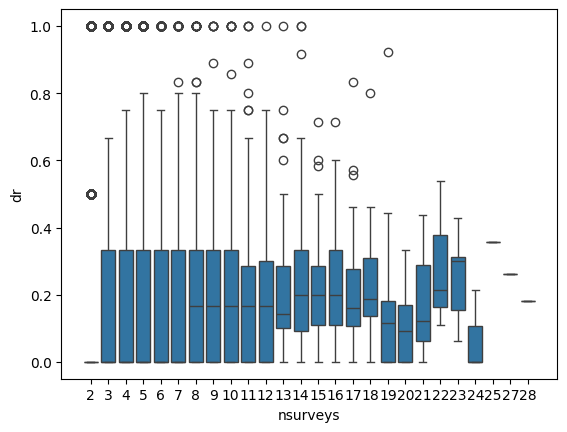

In [31]:
dup_ind = data.groupby(['HASH', 'biweekly_period', 'INDUSTRY']).agg(
    nsurveys = ('CLIENT_ID','count'),
    nloans = ('DISBURSED', sum),
    ndefaults = ('DR1', sum),
    npfraud = ('PTFRAUD', sum)
)
dup_ind = dup_ind[dup_ind['nsurveys'] >= 2]
dup_ind['dr'] = dup_ind['ndefaults']/dup_ind['nloans']
dup_ind['fr'] = dup_ind['npfraud']/dup_ind['nloans']
sns.boxplot(x= 'nsurveys', y= 'dr', data = dup_ind)
plt.plot()

Blocked Hashes Analysis

In [32]:
surveys = pd.read_csv('data/surveys (1).csv')

In [33]:
blocks = pd.read_csv('data/Blocked Hashes Ghana -Updated Dec30 - Sheet1 (1).csv')
blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   hash_name       39 non-null     object
 1   From_Date       39 non-null     object
 2   To_Date         39 non-null     object
 3   Ticket_Number   39 non-null     object
dtypes: object(4)
memory usage: 1.3+ KB


In [34]:
blocks['From_Date '] = pd.to_datetime(blocks['From_Date '])
blocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   hash_name       39 non-null     object        
 1   From_Date       39 non-null     datetime64[ns]
 2   To_Date         39 non-null     object        
 3   Ticket_Number   39 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.3+ KB


In [35]:
blocked_records = surveys[surveys['HASH'].isin(blocks['hash_name'])]

In [36]:
blocked_records

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
41,ecq50,923505267,2024-01-29,2024-01-30 10:04:17.000,Opposite GCB Bank,princekwakye71@gmail.com,Station Manager,2024-02-01 08:52:45.000,Oil & Gas,1,0,0,0
168,s10s5,732430721,2024-04-08,2024-04-11 16:38:15.000,L191 Asiabor Street,patienceemefalebi@gmail.com,I am a manager,2024-07-10 13:48:24.000,Agriculture,1,0,0,0
188,ecp8x,565755169,2024-02-26,2024-02-28 09:27:23.000,Near Amasaman Police Station,Sainalarry1@gmail.com,am a trader,2024-02-28 09:31:46.000,Textiles and Garment Making,1,0,0,0
237,s10md,780258968,2024-03-18,2024-03-18 15:00:51.000,Ghana water company limited,yayraprince7@gmail.com,fire fighter,2024-03-18 15:04:47.000,Security,1,0,0,0
270,ecr00,306907747,2024-03-04,2024-03-09 14:06:55.000,Nana Weredu Street,NaN,spinner,2024-03-09 14:16:08.000,Entertainment,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380340,ebzj6,762759273,2024-10-07,2024-10-08 17:33:09.000,Abura Roman Street,NaN,Trader,NaN,Trade - Import/Export,0,0,0,0
380358,ecpfx,577872047,2024-09-30,2024-10-01 18:33:01.000,near to the king palace,narteyeric1234@gmail.com,farmer,NaN,Agriculture,0,0,0,0
380399,ecn5r,906075619,2024-09-23,2024-09-28 11:13:49.000,Near Methodist Church,yeboahsusana02@gmail.com,owner,NaN,Food Industry,0,0,0,0
380441,ebytc,477182242,2024-11-11,2024-11-13 01:48:34.000,Assemblies Of God Church,charlesbrew0@gmail.com,Im a Secretary,NaN,Banking and Financial Services,0,0,0,0


In [37]:
blocked_records['max_survey_date'] = blocked_records.groupby('HASH')['SURVEY_DATE'].transform('max')
blocked_records


/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/2316753149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_records['max_survey_date'] = blocked_records.groupby('HASH')['SURVEY_DATE'].transform('max')


,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,max_survey_date
41,ecq50,923505267,2024-01-29,2024-01-30 10:04:17.000,Opposite GCB Bank,princekwakye71@gmail.com,Station Manager,2024-02-01 08:52:45.000,Oil & Gas,1,0,0,0,2024-12-28 13:25:16.000
168,s10s5,732430721,2024-04-08,2024-04-11 16:38:15.000,L191 Asiabor Street,patienceemefalebi@gmail.com,I am a manager,2024-07-10 13:48:24.000,Agriculture,1,0,0,0,2024-12-24 16:52:20.000
188,ecp8x,565755169,2024-02-26,2024-02-28 09:27:23.000,Near Amasaman Police Station,Sainalarry1@gmail.com,am a trader,2024-02-28 09:31:46.000,Textiles and Garment Making,1,0,0,0,2024-12-29 06:25:36.000
237,s10md,780258968,2024-03-18,2024-03-18 15:00:51.000,Ghana water company limited,yayraprince7@gmail.com,fire fighter,2024-03-18 15:04:47.000,Security,1,0,0,0,2024-12-30 14:56:22.000
270,ecr00,306907747,2024-03-04,2024-03-09 14:06:55.000,Nana Weredu Street,NaN,spinner,2024-03-09 14:16:08.000,Entertainment,1,0,0,0,2024-12-30 10:09:01.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380340,ebzj6,762759273,2024-10-07,2024-10-08 17:33:09.000,Abura Roman Street,NaN,Trader,NaN,Trade - Import/Export,0,0,0,0,2024-12-30 11:13:24.000
380358,ecpfx,577872047,2024-09-30,2024-10-01 18:33:01.000,near to the king palace,narteyeric1234@gmail.com,farmer,NaN,Agriculture,0,0,0,0,2024-12-30 12:23:28.000
380399,ecn5r,906075619,2024-09-23,2024-09-28 11:13:49.000,Near Methodist Church,yeboahsusana02@gmail.com,owner,NaN,Food Industry,0,0,0,0,2024-12-30 10:36:58.000
380441,ebytc,477182242,2024-11-11,2024-11-13 01:48:34.000,Assemblies Of God Church,charlesbrew0@gmail.com,Im a Secretary,NaN,Banking and Financial Services,0,0,0,0,2024-12-26 07:16:15.000


In [38]:
blocked_records['max_survey_date'].min()

'2024-11-29 12:55:06.000'

In [39]:
blocked_records['DISB_DATE'] = pd.to_datetime(blocked_records['DISB_DATE'])

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/1602683570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_records['DISB_DATE'] = pd.to_datetime(blocked_records['DISB_DATE'])


In [40]:
blocked_records['max_disb_date'] = blocked_records.groupby('HASH')['DISB_DATE'].transform('max')
blocked_records

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/993807652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_records['max_disb_date'] = blocked_records.groupby('HASH')['DISB_DATE'].transform('max')


,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,max_survey_date,max_disb_date
41,ecq50,923505267,2024-01-29,2024-01-30 10:04:17.000,Opposite GCB Bank,princekwakye71@gmail.com,Station Manager,2024-02-01 08:52:45,Oil & Gas,1,0,0,0,2024-12-28 13:25:16.000,2025-02-08 15:12:52
168,s10s5,732430721,2024-04-08,2024-04-11 16:38:15.000,L191 Asiabor Street,patienceemefalebi@gmail.com,I am a manager,2024-07-10 13:48:24,Agriculture,1,0,0,0,2024-12-24 16:52:20.000,2024-12-30 17:31:46
188,ecp8x,565755169,2024-02-26,2024-02-28 09:27:23.000,Near Amasaman Police Station,Sainalarry1@gmail.com,am a trader,2024-02-28 09:31:46,Textiles and Garment Making,1,0,0,0,2024-12-29 06:25:36.000,2024-11-14 16:25:25
237,s10md,780258968,2024-03-18,2024-03-18 15:00:51.000,Ghana water company limited,yayraprince7@gmail.com,fire fighter,2024-03-18 15:04:47,Security,1,0,0,0,2024-12-30 14:56:22.000,2025-02-05 12:26:00
270,ecr00,306907747,2024-03-04,2024-03-09 14:06:55.000,Nana Weredu Street,NaN,spinner,2024-03-09 14:16:08,Entertainment,1,0,0,0,2024-12-30 10:09:01.000,2024-11-25 16:07:03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380340,ebzj6,762759273,2024-10-07,2024-10-08 17:33:09.000,Abura Roman Street,NaN,Trader,NaT,Trade - Import/Export,0,0,0,0,2024-12-30 11:13:24.000,2025-02-04 14:22:26
380358,ecpfx,577872047,2024-09-30,2024-10-01 18:33:01.000,near to the king palace,narteyeric1234@gmail.com,farmer,NaT,Agriculture,0,0,0,0,2024-12-30 12:23:28.000,2024-11-06 08:22:44
380399,ecn5r,906075619,2024-09-23,2024-09-28 11:13:49.000,Near Methodist Church,yeboahsusana02@gmail.com,owner,NaT,Food Industry,0,0,0,0,2024-12-30 10:36:58.000,NaT
380441,ebytc,477182242,2024-11-11,2024-11-13 01:48:34.000,Assemblies Of God Church,charlesbrew0@gmail.com,Im a Secretary,NaT,Banking and Financial Services,0,0,0,0,2024-12-26 07:16:15.000,2024-01-11 16:19:46


In [41]:
blocked_records['SURVEY_DATE'] = pd.to_datetime(blocked_records['SURVEY_DATE'])

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3930202645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_records['SURVEY_DATE'] = pd.to_datetime(blocked_records['SURVEY_DATE'])


In [42]:
blocked_records['days_prior_block'] = (blocked_records['max_disb_date']- blocked_records['SURVEY_DATE']).dt.days 

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/3229228003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blocked_records['days_prior_block'] = (blocked_records['max_disb_date']- blocked_records['SURVEY_DATE']).dt.days


In [43]:
blocked_records

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,max_survey_date,max_disb_date,days_prior_block
41,ecq50,923505267,2024-01-29,2024-01-30 10:04:17,Opposite GCB Bank,princekwakye71@gmail.com,Station Manager,2024-02-01 08:52:45,Oil & Gas,1,0,0,0,2024-12-28 13:25:16.000,2025-02-08 15:12:52,375.0
168,s10s5,732430721,2024-04-08,2024-04-11 16:38:15,L191 Asiabor Street,patienceemefalebi@gmail.com,I am a manager,2024-07-10 13:48:24,Agriculture,1,0,0,0,2024-12-24 16:52:20.000,2024-12-30 17:31:46,263.0
188,ecp8x,565755169,2024-02-26,2024-02-28 09:27:23,Near Amasaman Police Station,Sainalarry1@gmail.com,am a trader,2024-02-28 09:31:46,Textiles and Garment Making,1,0,0,0,2024-12-29 06:25:36.000,2024-11-14 16:25:25,260.0
237,s10md,780258968,2024-03-18,2024-03-18 15:00:51,Ghana water company limited,yayraprince7@gmail.com,fire fighter,2024-03-18 15:04:47,Security,1,0,0,0,2024-12-30 14:56:22.000,2025-02-05 12:26:00,323.0
270,ecr00,306907747,2024-03-04,2024-03-09 14:06:55,Nana Weredu Street,NaN,spinner,2024-03-09 14:16:08,Entertainment,1,0,0,0,2024-12-30 10:09:01.000,2024-11-25 16:07:03,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380340,ebzj6,762759273,2024-10-07,2024-10-08 17:33:09,Abura Roman Street,NaN,Trader,NaT,Trade - Import/Export,0,0,0,0,2024-12-30 11:13:24.000,2025-02-04 14:22:26,118.0
380358,ecpfx,577872047,2024-09-30,2024-10-01 18:33:01,near to the king palace,narteyeric1234@gmail.com,farmer,NaT,Agriculture,0,0,0,0,2024-12-30 12:23:28.000,2024-11-06 08:22:44,35.0
380399,ecn5r,906075619,2024-09-23,2024-09-28 11:13:49,Near Methodist Church,yeboahsusana02@gmail.com,owner,NaT,Food Industry,0,0,0,0,2024-12-30 10:36:58.000,NaT,NaN
380441,ebytc,477182242,2024-11-11,2024-11-13 01:48:34,Assemblies Of God Church,charlesbrew0@gmail.com,Im a Secretary,NaT,Banking and Financial Services,0,0,0,0,2024-12-26 07:16:15.000,2024-01-11 16:19:46,-307.0


In [44]:
priors = blocked_records[(blocked_records['days_prior_block'] <= 14) & (blocked_records['SURVEY_DATE'] <= blocked_records['max_disb_date'])]

In [45]:
priors

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD,max_survey_date,max_disb_date,days_prior_block
6354,ecpcw,31481314,2024-10-21,2024-10-23 13:36:58,"Near Ayikuma police station.Olives Stree, King...",brightbright49@gmail.com,School proprietor,2024-10-29 06:54:10,Education,1,0,0,0,2024-12-30 16:58:35.000,2024-11-06 18:45:39,14.0
8889,ebytc,760070002,2024-01-08,2024-01-08 12:47:46,TB 74 Teberebe,NaN,I sell tubers,2024-01-08 14:22:52,Trade - Retail,1,1,0,1,2024-12-26 07:16:15.000,2024-01-11 16:19:46,3.0
15132,ecpfb,408262718,2024-11-25,2024-11-27 16:35:33,Brong Densuso,NaN,Im the owner,2024-11-27 16:37:15,Trade - Retail,1,1,0,1,2024-12-30 17:05:07.000,2024-11-27 16:37:15,0.0
16509,ecp8x,433896130,2024-11-04,2024-11-08 12:57:40,Dome sampah man,Harrietoblitey43@gmail.com,I am a food vendor,NaT,Food Industry,0,0,0,0,2024-12-29 06:25:36.000,2024-11-14 16:25:25,6.0
17964,ecpcw,780054771,2024-10-28,2024-10-30 08:40:53,Akoto lane,NaN,Research Assistant,NaT,Healthcare,0,0,0,0,2024-12-30 16:58:35.000,2024-11-06 18:45:39,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379367,ecp8x,972812515,2024-11-04,2024-11-09 07:28:11,kotoku Station,Nsibichanjonaskofi@gmail.com,I am Technical engineering,NaT,Education,0,0,0,0,2024-12-29 06:25:36.000,2024-11-14 16:25:25,5.0
379754,ecp8x,785762128,2024-10-28,2024-11-01 08:17:13,ADJEN KOTOKU,assiamtesse1989@gmail.com,tilling,NaT,Legal,0,0,0,0,2024-12-29 06:25:36.000,2024-11-14 16:25:25,13.0
379941,ecpfx,29802110,2024-10-28,2024-10-31 09:21:22,Low cost,Shakestyb@gmail.com,Im a contractor,NaT,Construction,0,0,0,0,2024-12-30 12:23:28.000,2024-11-06 08:22:44,5.0
379944,ecpcw,652686894,2024-10-28,2024-10-31 08:53:27,Church Building,0249262122al@gmail.com,Herbal Doctor,NaT,Healthcare,0,0,0,0,2024-12-30 16:58:35.000,2024-11-06 18:45:39,6.0


In [46]:
priors['HASH'].nunique()

25

In [47]:
# overall default
priors['DR1'].sum()/ priors['DISBURSED'].sum()

np.float64(0.4722222222222222)

In [48]:
# dr by hash
hash_dr = priors.groupby('HASH').agg(
    nloans = ('DISBURSED', sum),
    ndefault = ('DR1', sum)
)
hash_dr = hash_dr.reset_index()
hash_dr['dr1'] = hash_dr['ndefault']/hash_dr['nloans']
hash_dr

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/4181904150.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hash_dr = priors.groupby('HASH').agg(
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/4181904150.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  hash_dr = priors.groupby('HASH').agg(


,HASH,nloans,ndefault,dr1
0,ebvuy,1,0,0.000000
1,ebytc,12,8,0.666667
2,ebyu6,0,0,NaN
3,ecjvc,0,0,NaN
4,ecny2,1,0,0.000000
5,ecp8x,1,0,0.000000
6,ecpbu,1,0,0.000000
7,ecpcw,2,0,0.000000
8,ecpdt,0,0,NaN
9,ecpfb,6,4,0.666667


In [49]:
high_default = hash_dr[hash_dr['dr1'] > 0.4]
high_default

,HASH,nloans,ndefault,dr1
1,ebytc,12,8,0.666667
9,ecpfb,6,4,0.666667
11,ecpj9,9,4,0.444444
13,ecqkg,12,6,0.500000
19,s109g,16,7,0.437500
22,s10eu,5,5,1.000000


In [50]:
default_surveys = surveys[surveys['HASH'].isin(high_default['HASH'])]
default_surveys

,HASH,CLIENT_ID,SURVEY_WEEK,SURVEY_DATE,ADDRESS,EMAIL,POSITION,DISB_DATE,INDUSTRY,DISBURSED,DR1,DEFAULTED,PTFRAUD
635,ecpfb,662677670,2024-01-22,2024-01-28 10:32:23.000,Lawson Avenue,Saviouramankwah77@gmail.com,Techical officer,2024-01-28 12:48:33.000,Agriculture,1,0,0,0
4902,s109g,194278769,2024-07-15,2024-07-21 04:23:24.000,Mississippi street,seyramoutcome@gmail.com,I am a painter picture making sculpture and more,2024-07-21 20:30:44.000,Artisan,1,0,0,0
6230,ecqkg,335512430,2024-04-29,2024-05-05 11:09:34.000,H128 Nkona,ericasumahensah3@gmail.com,Nursing,2024-05-05 11:23:20.000,Healthcare,1,1,0,1
7164,ecqkg,163174638,2024-10-28,2024-10-30 23:01:08.000,Amsterdam pub,suwiequentina3@gmail.com,Im an assistant supply officer,2024-10-30 23:04:36.000,Public Administration,1,0,0,0
8789,ecpfb,956848256,2024-11-04,2024-11-10 21:23:41.000,Akwadum around about,williamayitey29@gmail.com,driver,2024-11-10 21:26:07.000,Transportation,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378334,ebytc,634132487,2024-04-15,2024-04-16 17:57:07.000,Bukom street,Familpatience92@gmail.com,I am a provision store keeper,NaN,Trade - Retail,0,0,0,0
378589,ecpfb,624714641,2024-08-05,2024-08-06 12:55:08.000,AKD 26,ingirazak7@gmail.com,a field worker,NaN,Agriculture,0,0,0,0
379108,s10eu,769950448,2024-12-16,2024-12-19 09:31:24.000,p.o Box 58,NaN,kentey,NaN,Trade - Wholesale,0,0,0,0
379340,s109g,527833391,2024-09-16,2024-09-17 13:04:54.000,P O box,NaN,Im a ride motto for a living please,NaN,Advisory/Consulting,0,0,0,0


In [51]:
default_surveys['ADDRESS'] = default_surveys['ADDRESS'].str.lower
default_surveys['POSITION'] = default_surveys['POSITION'].str.lower

/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/4016755476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_surveys['ADDRESS'] = default_surveys['ADDRESS'].str.lower
/var/folders/br/rqk8kpt50q1_dkr0c2p_53lh0000gp/T/ipykernel_18799/4016755476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_surveys['POSITION'] = default_surveys['POSITION'].str.lower


Checking For Features Influencing Defaults

In [52]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [53]:
label_encoder = LabelEncoder()

cat_cols = ['ADDRESS','POSITION', 'INDUSTRY']
for  col in cat_cols:
    df[col] = df[col].str.lower()

for  col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

KeyError: 'ADDRESS'